In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from pylab import rcParams
from matplotlib.colors import ListedColormap

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

import warnings
warnings.filterwarnings('ignore')

In [26]:
X, y =make_circles(n_samples=100, noise=0.1, random_state=1)

<AxesSubplot:>

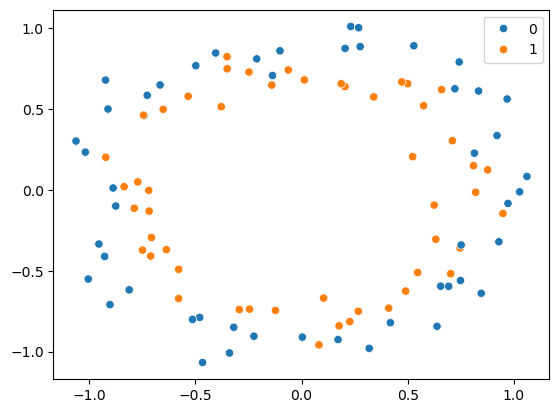

In [27]:
sns.scatterplot(x= X[:,0],y= X[:,1],hue=y)

In [28]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2, random_state=2)

In [29]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [30]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [32]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 0s 47ms/step - loss: 0.6953 - accuracy: 0.4000 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 2/3500
3/3 [==============================] - 0s 10ms/step - loss: 0.6926 - accuracy: 0.5000 - val_loss: 0.6958 - val_accuracy: 0.4000
Epoch 3/3500
3/3 [==============================] - 0s 11ms/step - loss: 0.6912 - accuracy: 0.5250 - val_loss: 0.6983 - val_accuracy: 0.3500
Epoch 4/3500
3/3 [==============================] - 0s 10ms/step - loss: 0.6899 - accuracy: 0.5500 - val_loss: 0.6998 - val_accuracy: 0.4000
Epoch 5/3500
3/3 [==============================] - 0s 11ms/step - loss: 0.6885 - accuracy: 0.5500 - val_loss: 0.7018 - val_accuracy: 0.4000
Epoch 6/3500
3/3 [==============================] - 0s 10ms/step - loss: 0.6879 - accuracy: 0.5500 - val_loss: 0.7047 - val_accuracy: 0.4000
Epoch 7/3500
3/3 [==============================] - 0s 12ms/step - loss: 0.6866 - accuracy: 0.5625 - val_loss: 0.7069 - val_accuracy: 0.4000
Epoch 8/3500


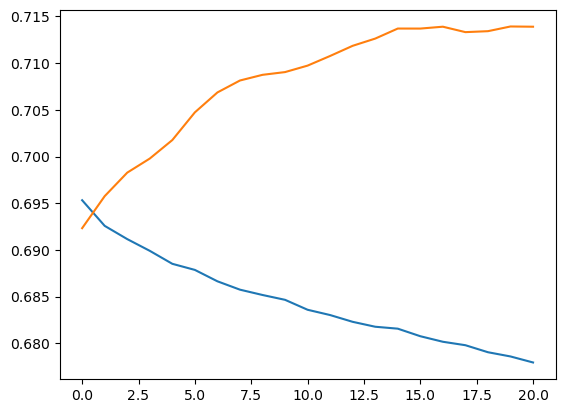

In [33]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')

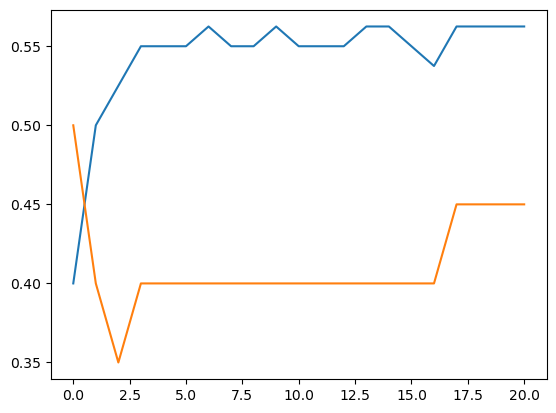

In [34]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')